In [378]:
import pandas as pd
import numpy as np

### Loading the feature functions from CSV and trimming

In [379]:
df = pd.read_csv("features/ff_pol.csv")

# Save to a CSV file
molecules = df['Mol'].values


molecules = molecules
molecules

array(['LiH', 'NaH', 'KH', 'RbH', 'CsH', 'CsCl', 'LiCl', 'CuI', 'LiF',
       'ZnS'], dtype=object)

### Size Modification and adding parameters to Data Frame

In [380]:
df

,Mol,Pol_C,Pol_A,CN_C,Ion_C,Ion_A,EA_A,EN_C,EN_A
0,LiH,164.10,4.51,6,5.392,13.590,0.754,0.98,2.20
1,NaH,162.70,4.51,6,5.139,13.590,0.754,0.93,2.20
2,KH,289.70,4.51,6,4.341,13.590,0.754,0.82,2.20
3,RbH,319.80,4.51,6,4.177,13.590,0.754,0.82,2.20
4,CsH,400.60,4.51,6,3.849,13.590,0.754,0.79,2.20
5,CsCl,400.60,14.60,8,3.849,12.960,3.617,0.79,3.16
6,LiCl,164.10,14.60,6,5.392,12.960,3.617,2.20,3.16
7,CuI,46.50,32.90,4,7.726,10.451,3.059,1.90,2.66
8,LiF,164.10,3.74,6,5.392,17.423,3.339,2.20,3.98
9,ZnS,38.67,19.40,4,9.394,10.360,2.077,1.65,2.58


In [381]:

%store -r res
res

[14.13330815446956,
 14.081369567351956,
 14.034265054162475,
 12.926169405830962,
 12.27212198878638,
 3.230739472566894,
 5.121300394981286,
 3.5739198265668453,
 4.715887333726234,
 2.499975609761724]

In [382]:
# drip first and 2nd row
# df = df.drop(index=[0,2], axis=1)
# res = res[1:2] + res[3:]
df

,Mol,Pol_C,Pol_A,CN_C,Ion_C,Ion_A,EA_A,EN_C,EN_A
0,LiH,164.10,4.51,6,5.392,13.590,0.754,0.98,2.20
1,NaH,162.70,4.51,6,5.139,13.590,0.754,0.93,2.20
2,KH,289.70,4.51,6,4.341,13.590,0.754,0.82,2.20
3,RbH,319.80,4.51,6,4.177,13.590,0.754,0.82,2.20
4,CsH,400.60,4.51,6,3.849,13.590,0.754,0.79,2.20
5,CsCl,400.60,14.60,8,3.849,12.960,3.617,0.79,3.16
6,LiCl,164.10,14.60,6,5.392,12.960,3.617,2.20,3.16
7,CuI,46.50,32.90,4,7.726,10.451,3.059,1.90,2.66
8,LiF,164.10,3.74,6,5.392,17.423,3.339,2.20,3.98
9,ZnS,38.67,19.40,4,9.394,10.360,2.077,1.65,2.58


In [383]:
# always inverse of EN_A
# val = df['EA_A']
# df['comb'] = 1/ df['EA_A']
# # df['comb'] = df['comb'] * df['Ion_C']
# df['comb'] = df['comb'] * df['CN_C']
# df['comb'] = df['comb'] * df['EN_C']
# df['comb'] = df['comb'] / df['Pol_A']

## always inverse of delta EN

## always inverse of pol_A ( anion polarisation)

## remove df['EA_A'] from the dataframe
df = df.drop(columns=['EA_A'])
# df = df.drop(columns=['Ion_C'])
# df = df.drop(columns=['Ion_A'])  
df = df.drop(columns=['CN_C'])
# df = df.drop(columns=['Pol_A'])
# df = df.drop(columns=['Pol_C'])
# df = df.drop(columns=['EN_C'])

# df = df.drop(columns=['Pol_A'])

res

[14.13330815446956,
 14.081369567351956,
 14.034265054162475,
 12.926169405830962,
 12.27212198878638,
 3.230739472566894,
 5.121300394981286,
 3.5739198265668453,
 4.715887333726234,
 2.499975609761724]

In [384]:
# df = df.iloc[:10,0:]


## always inverse of EN_A

# df['Sum_EN'] = df['EN_C'] + df['EN_A']
# df['Diff_EN'] = abs(df['EN_A'] - df['EN_C'])
# # df['Diff_rad'] = df['RadV_A'] - df['RadV_C']


# df['Sum_ion'] = df['Ion_C'] + df['Ion_A']
# df['Sum_ion'] = df['Sum_ion']*df['Sum_ion']*df['Sum_ion']

# df['Abs_diff_ion'] = abs(df['Ion_C'] - df['Ion_A'])
# df['Abs_diff_ion'] = df['Abs_diff_ion']*df['Abs_diff_ion']*df['Abs_diff_ion']

df['Sum_EN'] = df['EN_A'] + df['EN_C']
df['Sum_EN'] = df['Sum_EN']*df['Sum_EN']*df['Sum_EN']

df['Abs_diff_EN'] = abs(df['EN_A'] - df['EN_C'])
df['Abs_diff_EN'] = df['Abs_diff_EN']*df['Abs_diff_EN']*df['Abs_diff_EN']
# df['Abs_diff_pol'] = abs(df['Pol_C'] - df['Pol_A'])


df['Sum_pol'] = df['Pol_C'] + df['Pol_A']
df['Sum_pol'] = df['Sum_pol']*df['Sum_pol']*df['Sum_pol']

df['Abs_diff_pol'] = abs(df['Pol_C'] - df['Pol_A'])
df['Abs_diff_pol'] = df['Abs_diff_pol']*df['Abs_diff_pol']*df['Abs_diff_pol']


# Adding sqrt values for each column
# for col in df.columns:
#     # Make sure the column is numeric before applying sqrt
#     if pd.api.types.is_numeric_dtype(df[col]):
#         # df[f'{col}_sqrt'] = np.sqrt(abs(df[col]))
#         # df[f'{col}_squared'] = np.square(df[col])
#         df.drop(columns=[col], inplace=True)

# df = df.drop(columns=['EN_C'])

# df['sum_ion'] = df['Ion_C'] + df['Ion_A']
# # df['diff_ion'] = df['Ion_C'] - df['Ion_A']
# df['diff_pol'] = abs(df['Pol_C'] - df['Pol_A'])

# df = df[['Ion_C','Ion_A','Abs_diff_ion','Sum_ion','EN_C','EN_A']]

df.shape

(10, 11)

In [385]:
df

,Mol,Pol_C,Pol_A,Ion_C,Ion_A,EN_C,EN_A,Sum_EN,Abs_diff_EN,Sum_pol,Abs_diff_pol
0,LiH,164.10,4.51,5.392,13.590,0.98,2.20,32.157432,1.815848,4.793470e+06,4.064593e+06
1,NaH,162.70,4.51,5.139,13.590,0.93,2.20,30.664297,2.048383,4.675055e+06,3.958559e+06
2,KH,289.70,4.51,4.341,13.590,0.82,2.20,27.543608,2.628072,2.546668e+07,2.319545e+07
3,RbH,319.80,4.51,4.177,13.590,0.82,2.20,27.543608,2.628072,3.410995e+07,3.134228e+07
4,CsH,400.60,4.51,3.849,13.590,0.79,2.20,26.730899,2.803221,6.648427e+07,6.214149e+07
5,CsCl,400.60,14.60,3.849,12.960,0.79,3.16,61.629875,13.312053,7.157676e+07,5.751246e+07
6,LiCl,164.10,14.60,5.392,12.960,2.20,3.16,153.990656,0.884736,5.706550e+06,3.341362e+06
7,CuI,46.50,32.90,7.726,10.451,1.90,2.66,94.818816,0.438976,5.005662e+05,2.515456e+03
8,LiF,164.10,3.74,5.392,17.423,2.20,3.98,236.029032,5.639752,4.728097e+06,4.123710e+06
9,ZnS,38.67,19.40,9.394,10.360,1.65,2.58,75.686967,0.804357,1.958193e+05,7.155585e+03


### making the combinations

In [386]:
import itertools
import numpy as np
import pandas as pd
from multiprocessing import Pool, cpu_count

In [387]:
import itertools
import numpy as np
import pandas as pd

def generate_combinations_df(params_df, param_names):
    results = []

    # Convert all parameter values to numeric, coercing errors to NaN
    params_df = params_df.apply(pd.to_numeric, errors='coerce')

    # Precompute inverses of all parameters
    params_inv_df = params_df.applymap(lambda x: np.power(float(x), -1) if pd.notnull(x) and x != 0 else np.nan)
    params_inv_df.columns = [f"{name}^(-1)" for name in param_names]

    # Combine original parameters and their inverses
    combined_params_df = pd.concat([params_df, params_inv_df], axis=1)
    combined_param_names = list(combined_params_df.columns)

    # Precompute invalid pairs (parameter and its inverse)
    invalid_pairs = {f"{name}^(-1)": name for name in param_names}
    invalid_pairs.update({name: f"{name}^(-1)" for name in param_names})

    # Generate all subsets of parameters (combinations)
    for r in range(1, len(combined_param_names) + 1):
        for subset_indices in itertools.combinations(range(len(combined_param_names)), r):

            subset_names = [combined_param_names[i] for i in subset_indices]

            # Skip invalid subsets early
            if any(invalid_pairs.get(name) in subset_names for name in subset_names):
                continue

            # Select the subset DataFrame
            subset = combined_params_df[subset_names]

            # Replace NaN values with 0
            subset = subset.fillna(0)

            # Compute results for valid subsets
            expr_str = " * ".join(subset_names)
            expr_val = subset.prod(axis=1)
            results.append((expr_str, expr_val))

    return results


In [388]:
import itertools
import numpy as np
import pandas as pd

def generate_combinations_df(params_df, param_names, restricted_properties=None, restricted_to_inverses=None):
    if restricted_properties is None:
        restricted_properties = []
    if restricted_to_inverses is None:
        restricted_to_inverses = []

    results = []

    # Convert all parameter values to numeric, coercing errors to NaN
    params_df = params_df.apply(pd.to_numeric, errors='coerce')

    # Precompute inverses of all parameters
    params_inv_df = params_df.applymap(lambda x: np.power(float(x), -1) if pd.notnull(x) and x != 0 else np.nan)
    params_inv_df.columns = [f"{name}^(-1)" for name in param_names]

    # Combine original parameters and their inverses
    combined_params_df = pd.concat([params_df, params_inv_df], axis=1)
    combined_param_names = list(combined_params_df.columns)

     # Precompute invalid pairs (parameter and its inverse)
    invalid_pairs = {f"{name}^(-1)": name for name in param_names}
    invalid_pairs.update({name: f"{name}^(-1)" for name in param_names})
    
    # Generate all subsets of parameters (combinations)
    for r in range(1, len(combined_param_names) + 1):
        for subset_indices in itertools.combinations(range(len(combined_param_names)), r):
            subset_names = [combined_param_names[i] for i in subset_indices]

            # Replace NaN values with 0
             # Skip invalid subsets early
            if any(invalid_pairs.get(name) in subset_names for name in subset_names):
                continue
            
            subset = combined_params_df[subset_names]
            subset = subset.fillna(0)

            # Check if both a parameter and its inverse are in the subset
            invalid = False
            # for name in subset_names:
            #     if name.endswith("^(-1)") and name[:-5] in subset_names:
            #         invalid = True
            #         break
            #     elif name in param_names and f"{name}^(-1)" in subset_names:
            #         invalid = True
            #         break

            # Exclude subsets containing restricted inverses
            for restricted in restricted_properties:
                if f"{restricted}^(-1)" in subset_names:
                    invalid = True
                    break

            # Ensure restricted properties only appear as inverses
            for restricted in restricted_to_inverses:
                if restricted in subset_names or (restricted not in param_names and f"{restricted}^(-1)" not in subset_names):
                    invalid = True
                    break

            if invalid:
                continue

            # Compute results for valid subsets
            expr_str = " * ".join(subset_names)
            expr_val = subset.prod(axis=1)
            results.append((expr_str, expr_val))

    return results


In [389]:
import itertools
import numpy as np
import pandas as pd
from multiprocessing import Pool, cpu_count

def process_combinations_chunk(args):
    combined_params_df, combined_param_names, param_names, indices_chunk = args
    results = []

    for indices in indices_chunk:
        subset_names = [combined_param_names[i] for i in indices]
        subset = combined_params_df[subset_names]

        # Replace NaN values with 0
        subset = subset.fillna(0)

        # Check if both a parameter and its inverse are in the subset
        invalid = False
        for name in subset_names:
            if name.endswith("^(-1)") and name[:-5] in subset_names:
                invalid = True
                break
            elif name in param_names and f"{name}^(-1)" in subset_names:
                invalid = True
                break

        if not invalid:
            # Compute results for valid subsets
            expr_str = " * ".join(subset_names)
            expr_val = subset.prod(axis=1)
            results.append((expr_str, expr_val))

    return results

def generate_combinations_df_parallel(params_df, param_names):
    # Convert all parameter values to numeric, coercing errors to NaN
    params_df = params_df.apply(pd.to_numeric, errors='coerce')

    # Precompute inverses of all parameters
    params_inv_df = params_df.applymap(lambda x: np.power(float(x), -1) if pd.notnull(x) and x != 0 else np.nan)
    params_inv_df.columns = [f"{name}^(-1)" for name in param_names]

    # Combine original parameters and their inverses
    combined_params_df = pd.concat([params_df, params_inv_df], axis=1)
    combined_param_names = list(combined_params_df.columns)

    # Generate all subsets of parameter indices
    all_combinations = [
        indices for r in range(1, len(combined_param_names) + 1)
        for indices in itertools.combinations(range(len(combined_param_names)), r)
    ]

    # Divide all_combinations into chunks
    num_workers = min(cpu_count(), len(all_combinations))
    chunk_size = max(1, len(all_combinations) // num_workers)
    chunks = [all_combinations[i:i + chunk_size] for i in range(0, len(all_combinations), chunk_size)]

    print(f"Using {num_workers} workers to process {len(all_combinations)} combinations in {len(chunks)} chunks")

    # Prepare arguments for parallel processing
    args = [
        (combined_params_df, combined_param_names, param_names, chunk)
        for chunk in chunks
    ]

    # Use multiprocessing to process combinations in parallel
    with Pool(processes=num_workers) as pool:
        results = pool.map(process_combinations_chunk, args)

    # Flatten results
    flattened_results = [item for sublist in results for item in sublist]
    return flattened_results


In [390]:
numeretor = ['Ion_C','Ion_A']
denomeretor = ['Abs_diff_pol','Sum_pol','Abs_diff_EN','Sum_EN']

In [391]:

import os
import pandas as pd

takeSaved = False

all_expressions = []
expressions = []
# Define file name to save/load the results
cache_file = "cached_expressions.pkl"

if os.path.exists(cache_file) and takeSaved:
    # Load the cached results if they exist
    expressions = pd.read_pickle(cache_file)
    all_expressions = list(expressions.itertuples(index=False, name=None))
    print("Loaded cached expressions.")
else:
    # Perform the costly computation if cache does not exist
    print("Calculating expressions...")
    param_names = list(df.columns)
    all_expressions = generate_combinations_df(df.iloc[:,], param_names, restricted_properties=numeretor, restricted_to_inverses=denomeretor)
    expressions = pd.DataFrame(all_expressions, columns=['Expression', 'Value'])

    # Save the results to cache
    expressions.to_pickle(cache_file)
    print("Expressions cached.")

# Print the shape of the expressions DataFrame
print(expressions.shape)


Calculating expressions...


C:\Users\user\AppData\Local\Temp\ipykernel_18864\3137650467.py:17: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  params_inv_df = params_df.applymap(lambda x: np.power(float(x), -1) if pd.notnull(x) and x != 0 else np.nan)


Expressions cached.
(15551, 2)


In [392]:
expressions['Value'] = expressions['Value'] 
expressions.head()

,Expression,Value
0,Mol,0 0.0 1 0.0 2 0.0 3 0.0 4 0.0 5...
1,Pol_C,0 164.10 1 162.70 2 289.70 3 319.8...
2,Pol_A,0 4.51 1 4.51 2 4.51 3 4.51 4 ...
3,Ion_C,0 5.392 1 5.139 2 4.341 3 4.177 4 ...
4,Ion_A,0 13.590 1 13.590 2 13.590 3 13.59...


### Addition results to the combinations

In [393]:
values_dict = {expr_str: expr_val for expr_str, expr_val in all_expressions}
values = pd.DataFrame(values_dict)
values['res'] = res

### Finding Corelation

In [394]:

correlation = values.corr()

correlation.shape

(15552, 15552)

In [395]:
results=correlation['res'].abs().sort_values(ascending=False)
print(results.iloc[0:20])
top_vars = results.iloc[1:20].index

res                                                                            1.000000
Ion_A * EN_A^(-1)                                                              0.987022
Ion_C * Ion_A * Pol_A^(-1) * EN_A^(-1) * Sum_EN^(-1)                           0.985889
Ion_A * EN_C * Pol_A^(-1) * EN_A^(-1) * Sum_EN^(-1)                            0.985857
Ion_C * Ion_A * Pol_A^(-1) * Sum_EN^(-1)                                       0.985476
EN_C * Pol_A^(-1) * EN_A^(-1) * Sum_EN^(-1)                                    0.985237
Ion_A * EN_C * EN_A * Sum_EN^(-1)                                              0.984633
Ion_C * Pol_A^(-1) * Sum_EN^(-1)                                               0.982247
Ion_C * Pol_A^(-1) * EN_A^(-1) * Sum_EN^(-1)                                   0.982143
Ion_A * EN_A * Pol_A^(-1) * EN_C^(-1) * Sum_EN^(-1) * Abs_diff_EN^(-1)         0.982128
Ion_A * Pol_A^(-1) * EN_C^(-1) * Sum_EN^(-1) * Abs_diff_EN^(-1)                0.981347
EN_C * Pol_A^(-1) * Sum_EN^(-1) 

### Final Results

In [396]:
results=correlation['res'].abs().sort_values(ascending=False)
print(results.iloc[0:20])
top_vars = results.iloc[1:20].index


res                                                                            1.000000
Ion_A * EN_A^(-1)                                                              0.987022
Ion_C * Ion_A * Pol_A^(-1) * EN_A^(-1) * Sum_EN^(-1)                           0.985889
Ion_A * EN_C * Pol_A^(-1) * EN_A^(-1) * Sum_EN^(-1)                            0.985857
Ion_C * Ion_A * Pol_A^(-1) * Sum_EN^(-1)                                       0.985476
EN_C * Pol_A^(-1) * EN_A^(-1) * Sum_EN^(-1)                                    0.985237
Ion_A * EN_C * EN_A * Sum_EN^(-1)                                              0.984633
Ion_C * Pol_A^(-1) * Sum_EN^(-1)                                               0.982247
Ion_C * Pol_A^(-1) * EN_A^(-1) * Sum_EN^(-1)                                   0.982143
Ion_A * EN_A * Pol_A^(-1) * EN_C^(-1) * Sum_EN^(-1) * Abs_diff_EN^(-1)         0.982128
Ion_A * Pol_A^(-1) * EN_C^(-1) * Sum_EN^(-1) * Abs_diff_EN^(-1)                0.981347
EN_C * Pol_A^(-1) * Sum_EN^(-1) 

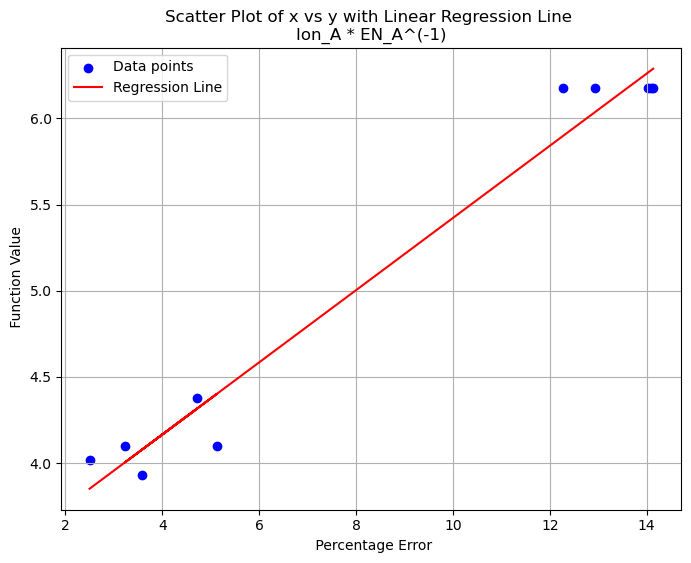

(0.9742115452720713, 0.02798030422418154, 'y = 0.2095x + 3.3271')

In [ ]:
param = top_vars[0]

y = values[param]
x = values['res']

import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Assuming x and y are Pandas Series
# Reshape x to a 2D array
x_reshaped = x.values.reshape(-1, 1)  # Convert x to a 2D array (n, 1)

# Create and fit the linear regression model
model = LinearRegression()
model.fit(x_reshaped, y)

# Get the slope (coefficient) and intercept
slope = model.coef_[0]  # model.coef_ gives the slope of the line
intercept = model.intercept_  # model.intercept_ gives the intercept

# Predict y values using the linear model
y_pred = model.predict(x_reshaped)

# Plot the data points and the regression line
plt.figure(figsize=(8, 6))
plt.scatter(x, y, color='blue', label='Data points')
plt.plot(x, y_pred, color='red', label='Regression Line')
plt.title(f'Scatter Plot of x vs y with Linear Regression Line \n{param}')
plt.xlabel(' Percentage Error')
plt.ylabel(' Function Value')
plt.grid()
plt.legend()
plt.show()

# Calculate R^2 and MSE
r_squared = r2_score(y, y_pred)
msd = mean_squared_error(y, y_pred)

# Display the equation of the line
equation = f"y = {slope:.4f}x + {intercept:.4f}"
r_squared, msd, equation


### Results

1. Ion_C * EN_A * Sum_ion * Abs_diff_ion * Ion_A^(-1) * EN_C^(-1) * Sum_EN^(-1) * Abs_diff_EN^(-1) 